CA1 - Programming for Data Analytics
 

   

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [69]:
#Check 5 first rows in the dataset
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [70]:
#Check 5 last rows in the dataset
Child_mortality.tail()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
67387,"Deaths per 1,000 Live Births",2018,4 weeks to 1 year,Sudden infant death syndrome,Roscommon,Rate,NaN
67388,"Deaths per 1,000 Live Births",2018,4 weeks to 1 year,Sudden infant death syndrome,Sligo,Rate,1.29
67389,"Deaths per 1,000 Live Births",2018,4 weeks to 1 year,Sudden infant death syndrome,Cavan,Rate,NaN
67390,"Deaths per 1,000 Live Births",2018,4 weeks to 1 year,Sudden infant death syndrome,Donegal,Rate,NaN
67391,"Deaths per 1,000 Live Births",2018,4 weeks to 1 year,Sudden infant death syndrome,Monaghan,Rate,NaN


In [71]:
#to check data types
Child_mortality.dtypes


Statistic Label              object
Year                          int64
Age Range                    object
Principal Cause of Death     object
Area                         object
UNIT                         object
VALUE                       float64
dtype: object

This dataset is composed of 3 different data types:
- Object=Text in python (str)
- Int64= Integer values
- Float64=Decimal values 

## Data Structures

Example of a List create to include all the posibles variation names of missing values in this dataset.

In [72]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
type(missing_value_formats)

list

Example of an Array to encode the variable "Area" and handle the categorical data.

In [73]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit_transform(Child_mortality ["Area"])

array([ 0,  5,  8, ...,  1,  4, 17])

Dictionary and tuples structures wast not required for this analysis. 

##  Slicing and Combining data

To slice the dataframe was required as the original dataframe Child_mortality was duplicating rows due the structure of the dataframe where the "UNIT" had 2 variables that shared all features but rate was added below the number creating duplicated rows instead to merged creating a new feature **Rate**. 

Was posible to observe this data structure in the EDA by checking the shape of the data Child_mortality and using the fuction unique value to check the "Unit" variables.

In [97]:
#unique values
Child_mortality["UNIT"].unique()

array(['Number', 'Rate'], dtype=object)

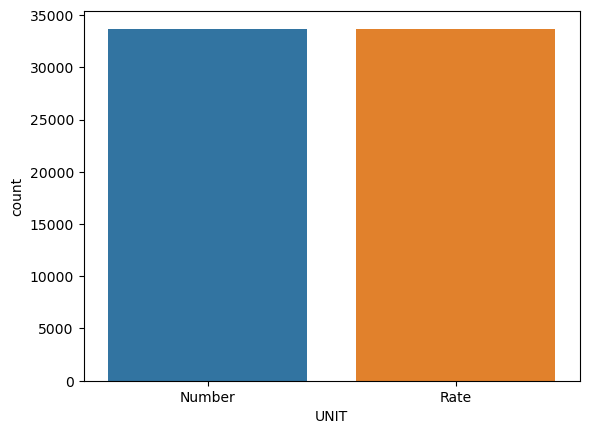

In [96]:

#Plot the unique values
# Plot the counts of unique values in the "UNIT" column
sns.countplot(data=Child_mortality, x="UNIT")
plt.show()

In [75]:
#To check size of the dataset
#This dataset has 67392 rows and 7 Columns
Child_mortality.shape

(67392, 7)

In [76]:
#Separating the variable "UNIT" in 2 diferent dataframes extracting by Number and Rate

Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [77]:
#To check size of the dataset
#This dataset has 33696 rows and 7 Columns
Number.shape

(33696, 7)

In [78]:
#To check size of the dataset
#This dataset has 33696 rows and 7 Columns
rate.shape

(33696, 7)

In this analisys was used the Merge function to combine data. However, 2 differents variations were used to combine the data. 

In [83]:
#First one using the "ON" preposition to use common features to combine the dataframes
#Using the pd.merge function to combine the dataframes "Number" and "rate" previously created by using the "ON" to select the common features in both dataframes "Year","Age Range","Principal Cause of Death", "Area" no create new columns.

Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area" ])
Mortality_rate.shape

(33696, 10)

In [84]:
Mortality_rate

,Statistic Label_x,Year,Age Range,Principal Cause of Death,Area,UNIT_x,VALUE_x,Statistic Label_y,UNIT_y,VALUE_y
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0,"Deaths per 1,000 Live Births",Rate,0.24
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0,"Deaths per 1,000 Live Births",Rate,0.71
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
...,...,...,...,...,...,...,...,...,...,...
33691,Deaths,2018,4 weeks to 1 year,Sudden infant death syndrome,Roscommon,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
33692,Deaths,2018,4 weeks to 1 year,Sudden infant death syndrome,Sligo,Number,1.0,"Deaths per 1,000 Live Births",Rate,1.29
33693,Deaths,2018,4 weeks to 1 year,Sudden infant death syndrome,Cavan,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
33694,Deaths,2018,4 weeks to 1 year,Sudden infant death syndrome,Donegal,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN


In [85]:
#drop innecesary columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)


In [86]:
#Rename columns

Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [88]:
Mortality_rate.shape

(33696, 6)

Another slicing was made to separte dataframes in numerical and catefgorical data to create a new dataframe with the encoding of the categorical data. 

In [11]:
#create a new dataframe including only numerical values in the dataframe Mortality_rate
Data_num = Mortality_rate[['Year','Number', 'Rate' ]]
Data_num

,Year,Number,Rate
0,1980,NaN,NaN
1,1980,5.0,0.24
2,1980,NaN,NaN
3,1980,1.0,0.71
4,1980,NaN,NaN
...,...,...,...
33691,2018,NaN,NaN
33692,2018,1.0,1.29
33693,2018,NaN,NaN
33694,2018,NaN,NaN


In [12]:
#create a new dataframe including only categorical values in the dataframe Mortality_rate
Mortality_rate_objects =Mortality_rate.select_dtypes(object)
print(Mortality_rate_objects)

               Age Range           Principal Cause of Death  \
0      Infant (0-1 year)  Infectious and parasitic diseases   
1      Infant (0-1 year)  Infectious and parasitic diseases   
2      Infant (0-1 year)  Infectious and parasitic diseases   
3      Infant (0-1 year)  Infectious and parasitic diseases   
4      Infant (0-1 year)  Infectious and parasitic diseases   
...                  ...                                ...   
33691  4 weeks to 1 year       Sudden infant death syndrome   
33692  4 weeks to 1 year       Sudden infant death syndrome   
33693  4 weeks to 1 year       Sudden infant death syndrome   
33694  4 weeks to 1 year       Sudden infant death syndrome   
33695  4 weeks to 1 year       Sudden infant death syndrome   

                         Area  
0                      Carlow  
1      Dublin City and County  
2                     Kildare  
3                    Kilkenny  
4                       Laois  
...                       ...  
33691              

In [13]:
#Calling  the library sklearn.preprocessing to apply Hot Encoding ising the function LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])

In [50]:
#Second one using the same Merge fuction but in this ocation was used the 
#left_index=True, right_index=True to indicate that the merging operation should be based on the indices of the two DataFrames  
#suffixes=("_l", "_r") to avoid posibles conflicts with duplicate Columns the suffixes "_l", "_r" were added to distinguish them in the new dataframe created. 

Mortality_rate_1 = pd.merge(Mortality_rate_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


## Flow Control (If/Else statements), functions

Examples of if/else statement 

In [19]:
#To check the area with a rate >5 in the whole dataframe
#Using the **for** loop.

for index, row in Mortality_rate.iterrows():
    if row['Rate'] > 9:
    
        print(f"Area: {row['Area']} has a Rate greater than 9.")

Area: Sligo has a Rate greater than 9.
Area: Longford has a Rate greater than 9.
Area: Sligo has a Rate greater than 9.
Area: Carlow has a Rate greater than 9.


In [20]:
#To check the areas in Ireland with a rate >5 for the year 2000 in the whole dataframe
#It's posible to look for 2 differents statements by using the "and" preposition, both statement have to be true to show a result.

for index, row in Mortality_rate.iterrows():
    if row['Year'] == 2000 and row['Rate'] > 5:
        print(f"Area: {row['Area']} had a Rate greater than 5 in 2000.")
        

Area: Carlow had a Rate greater than 5 in 2000.


In [21]:
#to look for 2 differents statements by using the "or" preposition, in this case if at least one of the statement is true it will show a result.
for index, row in Mortality_rate.iterrows():
    if row['Year'] == 2000 or row['Rate'] > 5:
        print(f"Area: {row['Area']} had a Rate greater than 5 in 2000.")

Area: Clare had a Rate greater than 5 in 2000.
Area: Cork had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Sligo had a Rate greater than 5 in 2000.
Area: Cavan had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Laois had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Mayo had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Cavan had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Longford had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Carlow had a Rate greater t

Area: Leitrim had a Rate greater than 5 in 2000.
Area: Mayo had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Sligo had a Rate greater than 5 in 2000.
Area: Cavan had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Monaghan had a Rate greater than 5 in 2000.
Area: Carlow had a Rate greater than 5 in 2000.
Area: Dublin City and County had a Rate greater than 5 in 2000.
Area: Kildare had a Rate greater than 5 in 2000.
Area: Kilkenny had a Rate greater than 5 in 2000.
Area: Laois had a Rate greater than 5 in 2000.
Area: Longford had a Rate greater than 5 in 2000.
Area: Louth had a Rate greater than 5 in 2000.
Area: Meath had a Rate greater than 5 in 2000.
Area: Offaly had a Rate greater than 5 in 2000.
Area: Westmeath had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Wicklow had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Cork had 

Area: Roscommon had a Rate greater than 5 in 2000.


This **for** loop was create to check in each Columns in the dataframe Mortality_rate_object and transform all the categorical data into numerical values, this a step that will allow us to apply differents machines learning models. Also by using thos **for** loop is not necesary to convert each column into numerical one by one it will check all the columns and transform them all together.  

In [49]:
#Calling  the library sklearn.preprocessing to apply Hot Encoding ising the function LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])

In [23]:
Mortality_rate_objects.head(10)

,Age Range,Principal Cause of Death,Area
0,2,5,0
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
6,2,5,14
7,2,5,16
8,2,5,19
9,2,5,24


# Functions 

In [24]:
# Sorting the DataFrame by the 'Rate' column in descending order and get the top 3 rows with the higher Rate in Dataframe.
#Defining the fuction top_3_areas_with_highest_rate

def top_3_areas_with_highest_rate(Mortality_rate):

    top_areas = Mortality_rate.sort_values(by='Rate', ascending=False).head(3)
    return top_areas


top_3 = top_3_areas_with_highest_rate(Mortality_rate)
print(top_3)
top_3.head(10)

       Year          Age Range  \
17442  2000  Infant (0-1 year)   
16574  1999  Infant (0-1 year)   
15719  1998  Infant (0-1 year)   

                                Principal Cause of Death      Area  Number  \
17442  Congenital malformations and chromosomal abnor...    Carlow     7.0   
16574  Certain conditions originating in the perinata...     Sligo     7.0   
15719  Congenital malformations and chromosomal abnor...  Longford     4.0   

       Rate  
17442  9.92  
16574  9.76  
15719  9.43  


,Year,Age Range,Principal Cause of Death,Area,Number,Rate
17442,2000,Infant (0-1 year),Congenital malformations and chromosomal abnor...,Carlow,7.0,9.92
16574,1999,Infant (0-1 year),Certain conditions originating in the perinata...,Sligo,7.0,9.76
15719,1998,Infant (0-1 year),Congenital malformations and chromosomal abnor...,Longford,4.0,9.43


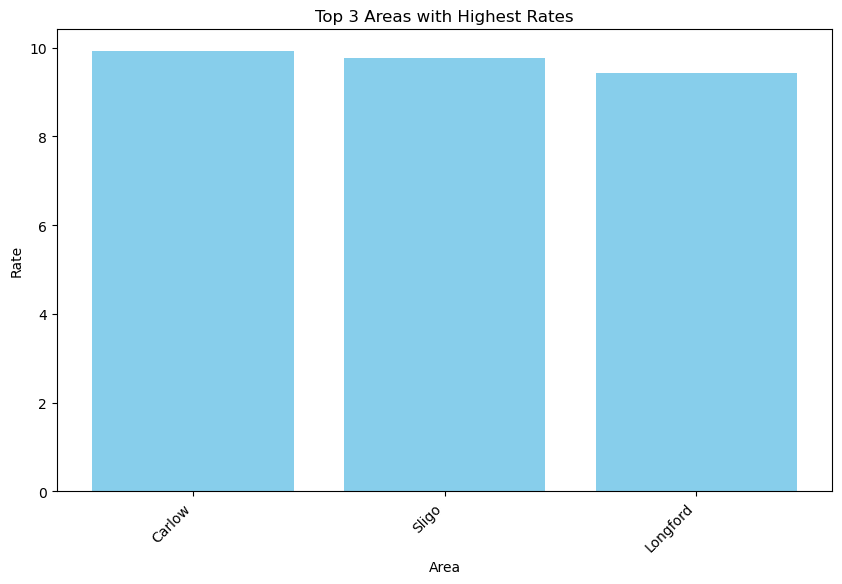

In [62]:
# Sorting the DataFrame by the 'Rate' column in descending order and get the top 3 rows
#Defining the fuction top_3_areas_with_highest_rate plot_top_3_areas_with_highest_rate to create a new plot
def plot_top_3_areas_with_highest_rate(Mortality_rate):

    top_areas = Mortality_rate.sort_values(by='Rate', ascending=False).head(3)
    
    # Create a bar plot for the top 3 areas
    plt.figure(figsize=(10, 6))
    plt.bar(top_areas['Area'], top_areas['Rate'], color='skyblue')
    plt.xlabel('Area')
    plt.ylabel('Rate')
    plt.title('Top 3 Areas with Highest Rates')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()

# Usage example:
plot_top_3_areas_with_highest_rate(Mortality_rate)

In [63]:
def find_the_highest_year_and_rate(Mortality_rate):
    # Find the row with the highest rate
    highest_rate_row = Mortality_rate[Mortality_rate['Rate'] == Mortality_rate['Rate'].max()]
    
    # Extract the year and rate from the highest rate row
    trend_year = highest_rate_row['Year'].values[0]
    trend_rate = highest_rate_row['Rate'].values[0]
    
    return trend_year, trend_rate

# Usage example:
trend_year, trend_rate = find_trend_year_and_rate(Mortality_rate)
print(f"The year with the highest rate is {trend_year} with a rate of {trend_rate}")




The year with the highest rate is 2000 with a rate of 9.92
